In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import matplotlib as mpl
import seaborn as sb
import numpy as np

In [2]:
def plot(get_chart, xlabel=None, ylabel=None, title=None , figsize=(10,6)):
    titledict = {'fontweight':'bold', 'fontsize': 15}
    labeldict = {'fontsize': 13}
    plt.figure(figsize = figsize)
    ax = get_chart()
    title and ax.set_title(title + "\n", fontdict=titledict)
    xlabel and ax.set_xlabel(xlabel, fontdict=labeldict)
    xlabel and ax.set_ylabel(ylabel, fontdict=labeldict)
    plt.show()

In [4]:
# lista de todos os arquivos
caged_files = sorted(glob('..\DadosCaged\CAGEDMOV*.txt'))
main_df = pd.concat((pd.read_csv(file, sep=';') for file in caged_files), ignore_index=True)

In [5]:
#Lista todos os arquivos carregados e concatenados no dataframe pandemia_df
caged_files

['..\\DadosCaged\\CAGEDMOV202001.txt',
 '..\\DadosCaged\\CAGEDMOV202002.txt',
 '..\\DadosCaged\\CAGEDMOV202003.txt',
 '..\\DadosCaged\\CAGEDMOV202004.txt',
 '..\\DadosCaged\\CAGEDMOV202005.txt',
 '..\\DadosCaged\\CAGEDMOV202006.txt',
 '..\\DadosCaged\\CAGEDMOV202007.txt',
 '..\\DadosCaged\\CAGEDMOV202008.txt',
 '..\\DadosCaged\\CAGEDMOV202009.txt',
 '..\\DadosCaged\\CAGEDMOV202010.txt',
 '..\\DadosCaged\\CAGEDMOV202011.txt',
 '..\\DadosCaged\\CAGEDMOV202012.txt',
 '..\\DadosCaged\\CAGEDMOV202101.txt',
 '..\\DadosCaged\\CAGEDMOV202102.txt',
 '..\\DadosCaged\\CAGEDMOV202103.txt']

In [6]:
#Lista as colunas do dataframe
main_df.columns

Index(['competência', 'região', 'uf', 'município', 'seção', 'subclasse',
       'saldomovimentação', 'cbo2002ocupação', 'categoria', 'graudeinstrução',
       'idade', 'horascontratuais', 'raçacor', 'sexo', 'tipoempregador',
       'tipoestabelecimento', 'tipomovimentação', 'tipodedeficiência',
       'indtrabintermitente', 'indtrabparcial', 'salário', 'tamestabjan',
       'indicadoraprendiz', 'fonte'],
      dtype='object')

In [7]:
#Quero poder visualizar as causas de demissão formalizadas pelos empregadores distribuídas por sexo, raça/cor e faixa etária

In [8]:
main_df.tail()

,competência,região,uf,município,seção,subclasse,saldomovimentação,cbo2002ocupação,categoria,graudeinstrução,...,tipoempregador,tipoestabelecimento,tipomovimentação,tipodedeficiência,indtrabintermitente,indtrabparcial,salário,tamestabjan,indicadoraprendiz,fonte
39694383,202103,3,35,355030,A,151201,1,724315,102,7,...,2,3,10,0,0,0,1500.000000,99,0,1
39694384,202103,3,35,355030,I,5620101,1,513205,111,7,...,0,1,20,0,1,0,6567.000000,7,0,1
39694385,202103,2,25,251370,C,1532700,-1,764105,101,7,...,0,1,31,0,0,0,1122.000000,10,0,1
39694386,202103,3,33,330455,I,5510801,-1,513505,101,6,...,0,1,31,0,0,0,1021.419983,5,0,1
39694387,202103,3,35,354980,G,4530701,-1,142105,101,9,...,0,1,31,0,0,0,4500.000000,4,0,1


In [9]:
main_df['descsexo']= main_df['sexo'].map({
1:'Masculino',
3:'Feminino',
9:'Nao Identificado'})
main_df['descraca'] = main_df['raçacor'].map({
1:'Branca',
2:'Preta',
3:'Parda',
4:'Amarela',
5:'Indigena',
6:'Nao Informada',
9:'Nao Identificado'})
main_df['desctipomovimentação'] = main_df['tipomovimentação'].map({
10:'Admissão por Primeiro Emprego',
20:'Admissão por Reemprego', 
25:'Admissão por contrato trabalho prazo determinado',
31:'Desligamento por Demissão sem Justa Causa', 
32:'Desligamento por Demissão com Justa Causa', 
33:'Culpa Recíproca',
35:'Admissão por Reintegraçao', 
40:'Desligamento a Pedido',
43:'Término contrato trabalho prazo determinado',
45:'Desligamento por Término de Contrato',
50:'Desligamento por Aposentadoria', 
60:'Desligamento por morte',
70:'Admissão por Transferência', 
80:'Desligamento por Transferência', 
90:'Desliamento por Acordo Empregado e Empregador',
98:'Desligamento de Tipo Ignorado',
99:'Não Identificado'})

In [10]:
conditions = [
    (main_df['tipomovimentação'].isin([10,20,25,35,70])),
    (main_df['tipomovimentação'].isin([31,32,33,40,43,45,50,60,80,90,98])),
    (main_df['tipomovimentação'].isin([99]))
    ]

values = ['Admissão', 'Desligamento', 'Não identificado']

main_df['Dados_de_movimentação'] = np.select(conditions, values)

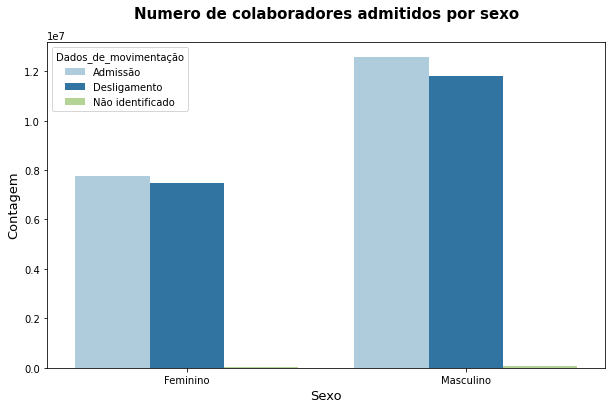

In [11]:
plot(
    get_chart = lambda: sb.countplot(x='descsexo', hue='Dados_de_movimentação',data = main_df, palette='Paired'),
    title = "Numero de colaboradores admitidos por sexo",
    xlabel = "Sexo",
    ylabel = "Contagem",
)

In [12]:
conditions = [
    ((main_df['idade'] >= 0) & (main_df['idade'] <= 19)),
    ((main_df['idade'] >= 20) & (main_df['idade'] <= 59)),
    (main_df['idade'] >= 60)
    ]

values = ['Jovem', 'Adulto', 'Idoso']

main_df['faixa_etaria'] = np.select(conditions, values)

In [13]:
main_df[main_df['faixa_etaria']=='0']['idade']

17207      NaN
321431     NaN
553920     NaN
760982     NaN
1029178    NaN
            ..
36332657   NaN
37886092   NaN
37988948   NaN
38440551   NaN
38890396   NaN
Name: idade, Length: 89, dtype: float64

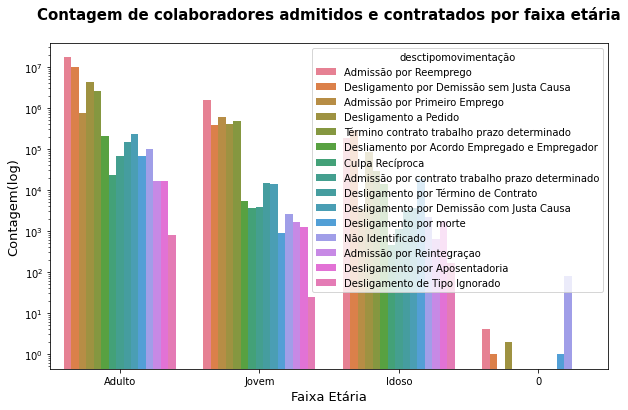

In [17]:
def get_chart():
    ax = sb.countplot(x='faixa_etaria',hue='desctipomovimentação',data = main_df, palette='husl')
    ax.set(yscale="log")
    return ax
plot(
    get_chart = get_chart,
    xlabel = "Faixa Etária",
    ylabel = "Contagem(log)",
    title = "Contagem de colaboradores admitidos e contratados por faixa etária" 
)